In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rdn

Bài 1: Fit model parabol linear regression cho dữ liệu: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv")

In [37]:
data.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


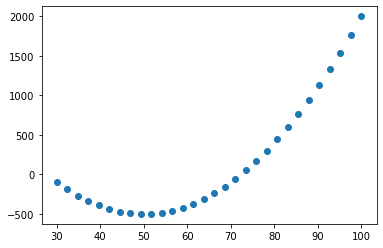

In [38]:
plt.scatter(x = data["Diện tích"], y= data["Giá nhà"])

In [39]:
class LinearModel:
    def __init__(self, data, x, y):
        self.data = data
        arr = np.array([1]*len(data)) # array of 1s
        self.x = np.array([arr, data[x],  np.power(data[x], 2)]).transpose()
        self.t = y
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
        
    def __repr__(self) -> str:
        return f"{self.model[0]:.3f} + {self.model[1]:.3f}x + {self.model[2]:.3f}x^2" 
    
    def plot(self, x, y):
        values = np.linspace(self.data[x].min(), self.data[x].max(), 100)
        plt.scatter(self.data[x], self.data[y])
        plt.xlabel = "mét vuông"
        plt.ylabel = "giá"
        plt.plot(values, self.model[0] + self.model[1] * values + self.model[2] * np.power(values, 2), color = "red")
        plt.show()
        
    def predict(self, x):
        return self.model[0] + self.model[1] * x
    
    
    

In [40]:
solution = LinearModel(data, "Diện tích", "Giá nhà")
print(solution)

2000.006 + -100.000x + 1.000x^2


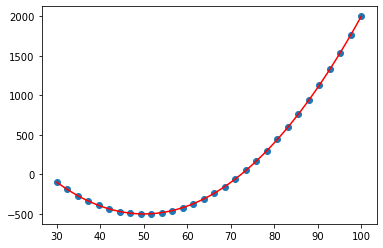

In [41]:
solution.plot("Diện tích", "Giá nhà")

In [42]:
solution.model

array([ 2.00000579e+03, -1.00000222e+02,  1.00000199e+00])

Bài 2: Tự sinh dữ liệu như ở hình dưới:

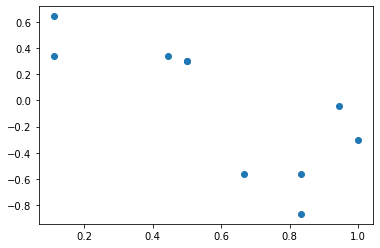

In [43]:
rdn.seed(82)
def generate_data(n):
    temp = np.linspace(0, 1, 19)
    x = rdn.choices(temp, k = n)
    t = pd.Series([np.sin(2*np.pi*i) + np.std(x) * rdn.choice([1, -1, 0]) for i in x])
    return pd.DataFrame({"x": x, "t":t})

data_10_points = generate_data(10)
plt.scatter(data_10_points["x"], data_10_points["t"])

In [44]:

class solution2:
    def __init__(self, data, x, y, power):
        self.data = data
        self.y = y
        self.power = power
        ar = np.array([1]*len(data)) 
        self.x = [ar]
        for i in range(1, power + 1):
            self.x.append(np.array(np.power(self.data[x], i)))
        self.x = np.array(self.x).transpose()
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
        
    def fit_new_data(self, new_data):
        self.data = new_data

    def predict(self, values):
        res = 0
        arr = np.array([])
        for i in range(0, self.power + 1):
            arr = np.append(arr, np.power(values, i))
        arr = arr.transpose()
        return arr.dot(self.model)
    
    def plot(self):
        variable = np.linspace(0, 1, 100)
        actual = [np.sin(2*np.pi*i) for i in variable]
        values = [self.predict(i) for i in variable]
        plt.scatter(self.data["x"], self.data["t"])
        plt.plot(variable, values, color = "r")
        plt.plot(variable, actual, color = "green")
        plt.legend(["predicted value", "sin(2pix)", "train value"])

    def ridge(self, alpha):
        xtx = (self.x).transpose().dot(self.x)
        return np.linalg.inv(xtx + np.identity(xtx.shape[0]).dot(alpha)).dot(self.x.transpose()).dot(self.data[self.y])
    
    def _predict_lasso(self, x):
        return x.dot(self.model) + self.b

    def lasso(self, learning_rate, lamda, iter):
        self.lamda = lamda
        self.iter = iter
        self.learning_rate = learning_rate
        self.m, self.n = self.x.shape
        self.model = np.zeros(self.n)
        self.b = 0
        for i in range(iter):
            self._update_w()
    
    def _update_w(self):
        t_pred = self._predict_lasso(self.x)
        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.model[i] > 0:
                dw[i] = (-(2*(self.x[:,i]).dot(self.data[self.y] - t_pred)) + self.lamda) / self.m 
            else:
                dw[i] = (-(2*(self.x[:,i]).dot(self.data[self.y] - t_pred)) - self.lamda) / self.m
        db = - 2 * np.sum(self.data[self.y] - t_pred) / self.m
    
        self.model = self.model - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    
    def get_model(self):
        return self.model
    
    

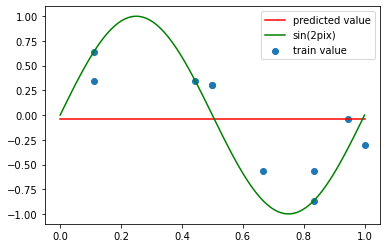

In [45]:
result = solution2(data_10_points, "x", "t", power=0)
result.plot()

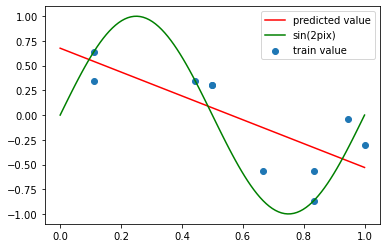

In [46]:
result = solution2(data_10_points, "x", "t", power=1)
result.plot()

Comment: model at power 0 and 1 gives poor fits to the data and gives poor representation of the function sin(2 pi x)

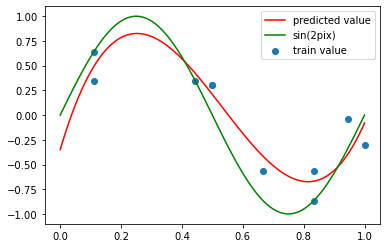

In [47]:
result = solution2(data_10_points, "x", "t", power=3)
result.plot()

Comment: model at power three gives relatively similar shape in comparison to the sin(2 pi x) curve, this may be the most suitable model if we know the information of the sin curve

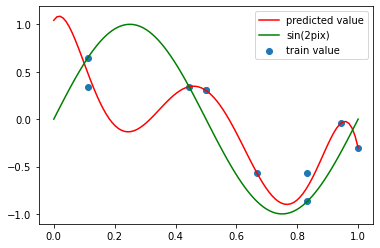

In [48]:
result = solution2(data_10_points, "x", "t", power=6)
result.plot()


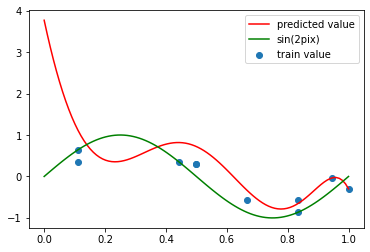

In [49]:
result = solution2(data_10_points, "x", "t", power=9)
result.plot()

Comment: as the power gets higher, the curves fits closer to the training data points but it is not of the same shape as the sin curve. this is due to overfitting

In [50]:
# solution 2b

def kfold(train_data):
    result = []
    res = None
    for i in range(10):
        validation = train_data[train_data["fold"] == i]
        train = train_data.drop(validation.index)
        model = solution2(train, "x", "t", power = 9)
        predicted = validation.apply(lambda row: model.predict(row["x"]), axis = 1)
        res = mse(model, validation)
        print(f"validation fold {i}: mean squared error: {res:.3f}")
        result.append(np.mean(res))
    # return result

def mse(model, test):
    predicted = test.apply(lambda row: model.predict(row["x"]), axis = 1)
    result = np.mean(np.power(test["t"] - predicted,2))
    return result

def predict(model, values):
    res = 0
    arr = np.array([])
    for i in range(0, 9 + 1):
        arr = np.append(arr, np.power(values, i))
    arr = arr.transpose()
    return arr.dot(model)

In [51]:
# generate data and split train and test set
data_25_points = generate_data(25)
data_25_points_train = data_25_points.sample(frac = 0.8)
data_25_points_test = data_25_points.drop(index = data_25_points_train.index)
k_size = len(data_25_points)/10
fold = np.repeat(np.array(range(0,10)), k_size)
np.random.shuffle(fold)
data_25_points_train["fold"] = fold

In [52]:
train_25 = solution2(data_25_points_train, "x", "t", power=9)
train_25.get_model()

array([-8.02909208e-04,  3.43779755e+01, -9.86131200e+02,  1.20175227e+04,
       -7.32279309e+04,  2.49171444e+05, -4.94264624e+05,  5.65329935e+05,
       -3.44166668e+05,  8.60923684e+04])

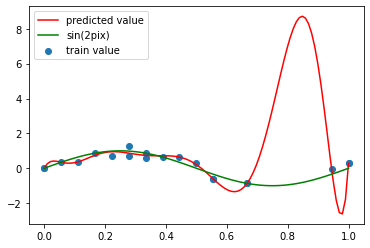

In [53]:
train_25.plot()

In [54]:
kfold(data_25_points_train)

validation fold 0: mean squared error: 0.212
validation fold 1: mean squared error: 0.001
validation fold 2: mean squared error: 46335.944
validation fold 3: mean squared error: 0.001
validation fold 4: mean squared error: 0.007
validation fold 5: mean squared error: 0.000
validation fold 6: mean squared error: 0.028
validation fold 7: mean squared error: 0.044
validation fold 8: mean squared error: 0.002
validation fold 9: mean squared error: 0.146


In [55]:
compare = data_25_points_test.copy()
compare["predicted"] = compare.apply(lambda row: train_25.predict(row["x"]), axis = 1)
compare

,x,t,predicted
1,0.333333,0.572440,0.739720
3,0.500000,-0.293586,0.211150
10,0.722222,-0.984808,1.518394
16,0.000000,-0.293586,-0.000803
20,0.277778,0.984808,0.866663


In [56]:
train_25.fit_new_data(data_25_points_test)

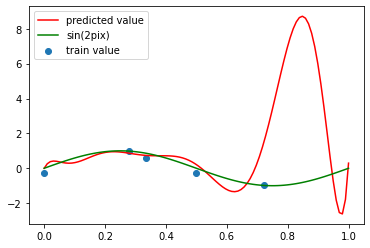

In [57]:
train_25.plot()

the mse in each fold is quite high, and the prediction for the test set is not correct. In conlusion, the model is still over-fitted to the training data set, however, the shape of the predicted curve gets closer to the sin curve

In [58]:
data_125_points = generate_data(125)
data_125_points_train = data_125_points.sample(frac = 0.8)
data_125_points_test = data_125_points.drop(index = data_125_points_train.index)
k_size = len(data_125_points_train)/10
fold = np.repeat(np.array(range(0,10)), k_size)
np.random.shuffle(fold)
data_125_points_train["fold"] = fold

In [59]:
data_125_points_train.tail()

,x,t,fold
28,0.777778,-6.744614e-01,8
38,0.166667,8.660254e-01,6
57,1.000000,-2.449294e-16,7
118,0.722222,-6.744614e-01,3
29,0.944444,-3.167378e-02,0


In [60]:
data_125_points_test.tail()

,x,t
93,0.333333,0.555679
94,0.777778,-0.674461
100,0.888889,-0.642788
101,1.000000,0.310346
113,0.055556,0.342020


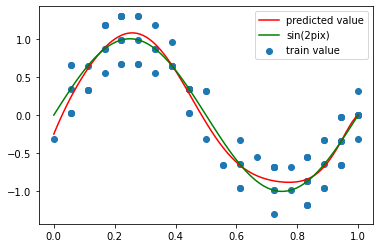

In [61]:
train_125 = solution2(data_125_points_train, "x", "t", power = 9)
train_125.plot()

In [62]:
kfold(data_125_points_train)

validation fold 0: mean squared error: 0.100
validation fold 1: mean squared error: 0.039
validation fold 2: mean squared error: 0.088
validation fold 3: mean squared error: 0.092
validation fold 4: mean squared error: 0.062
validation fold 5: mean squared error: 0.097
validation fold 6: mean squared error: 0.018
validation fold 7: mean squared error: 0.038
validation fold 8: mean squared error: 1.572
validation fold 9: mean squared error: 0.099


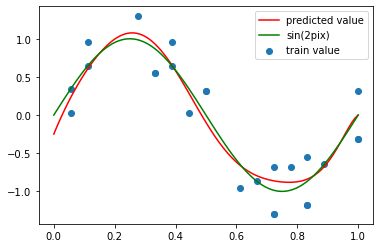

In [63]:
train_125.fit_new_data(data_125_points_test)
train_125.plot()

the mse for each fold is significantly lower than that of the case of 25 data points and the predicted curve from the test set is similar to the sin curve. The model is now giving a fairly accurate prediction.